# HR Analytics - Udacity Machine Learning Nanodegree Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  

## Data Loading

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EDA and Visualizations

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


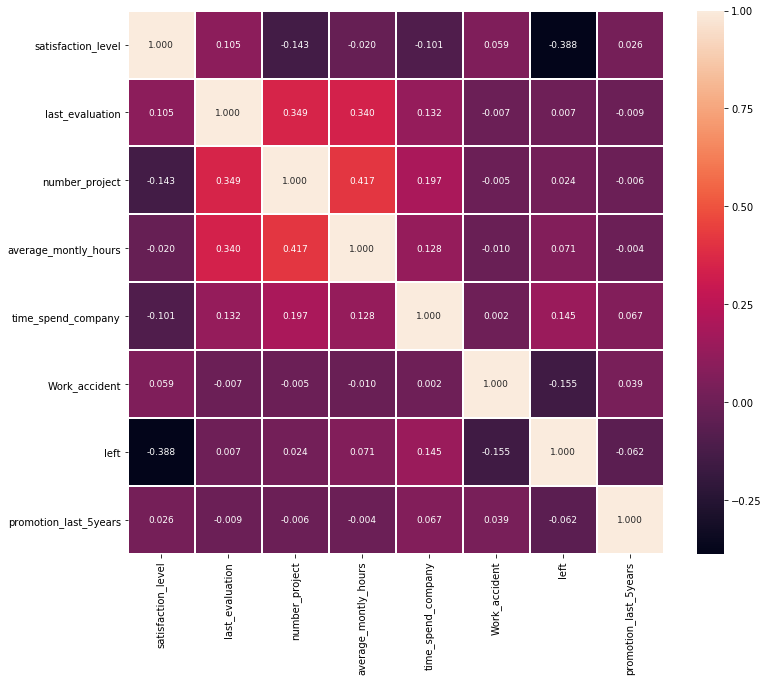

In [6]:
corr = df.corr()
fig, ax = plt.subplots(1,1,figsize=(12,10))
ax = sns.heatmap(corr, 
           annot=True,
            fmt = '.3f',
         linewidths=1,
                cbar = True,
           annot_kws={"size":9}
                )
plt.savefig('corr_matrix.pdf',bbox_inches='tight')

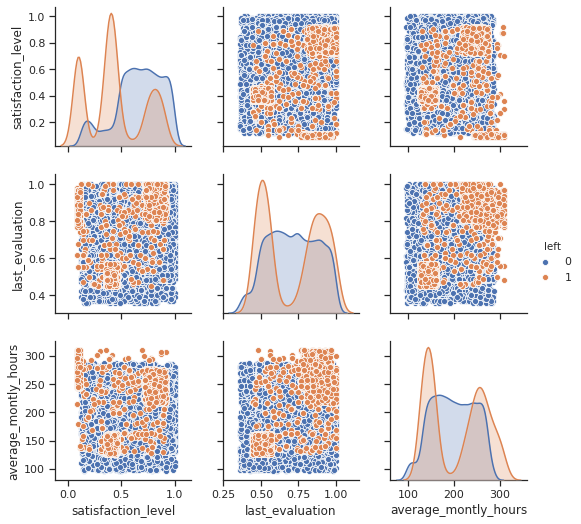

In [7]:
continuos_cols = ['satisfaction_level','last_evaluation','average_montly_hours']
sns.set(style="ticks")
ax = sns.pairplot(df, 
                      vars=continuos_cols,
                      hue="left")

ax.savefig('pairplot.pdf',bbox_inches='tight')

### Pairwise plots

trying to find some linear behaviour 


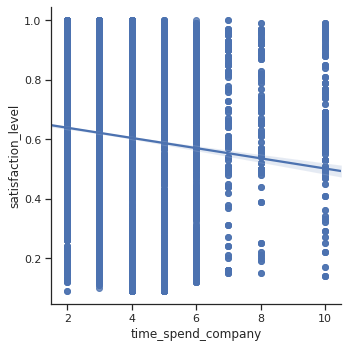

In [8]:
sns.lmplot(x = 'time_spend_company', y='satisfaction_level', data = df)

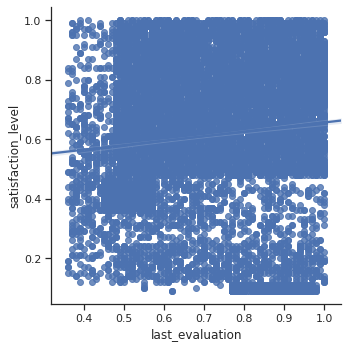

In [10]:
sns.lmplot(x = 'last_evaluation', y='satisfaction_level', data = df)

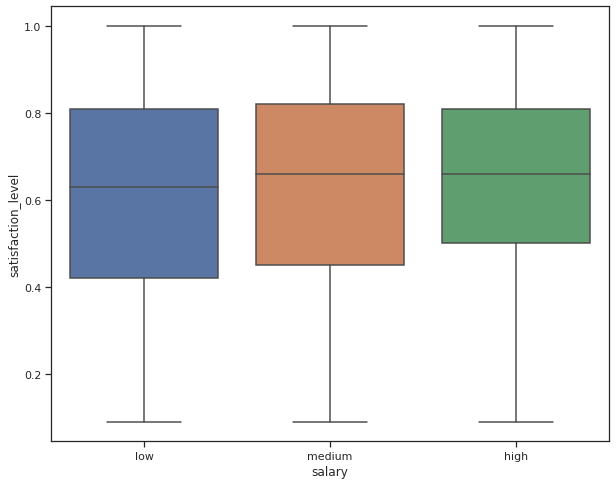

In [11]:
plt.figure(figsize=(10,8))
plot = sns.boxplot(x = 'salary', y = 'satisfaction_level', data = df)
plt.xticks(rotation = 0)
plt.savefig('boxplot1.pdf')

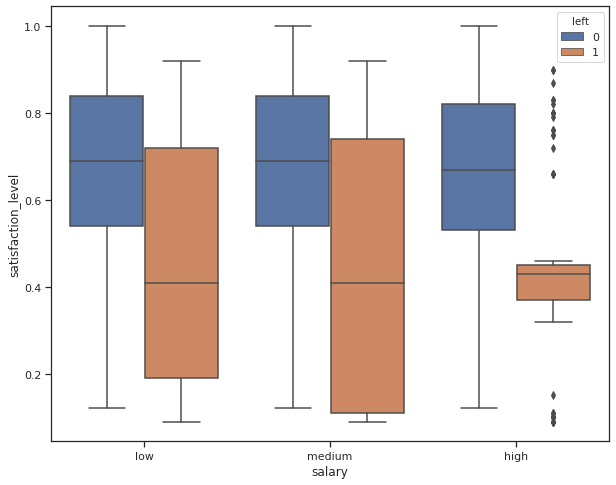

In [12]:
plt.figure(figsize=(10,8))
plot = sns.boxplot(x = 'salary', y = 'satisfaction_level', data = df, hue = 'left')
plt.xticks(rotation = 0)
plt.savefig('boxplot2.pdf')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

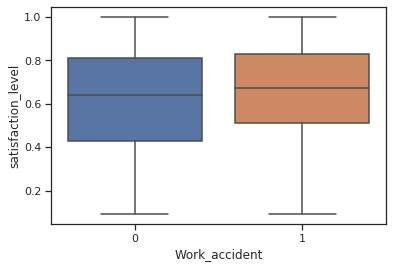

In [13]:
sns.boxplot(x = 'Work_accident', y = 'satisfaction_level', data = df)
plt.xticks(rotation = 0)

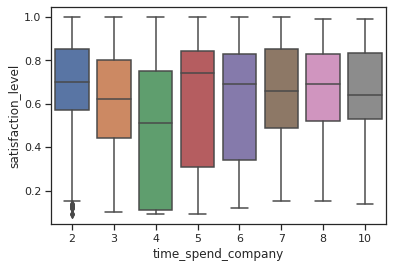

In [14]:
sns.boxplot(x = 'time_spend_company', y = 'satisfaction_level', data = df )

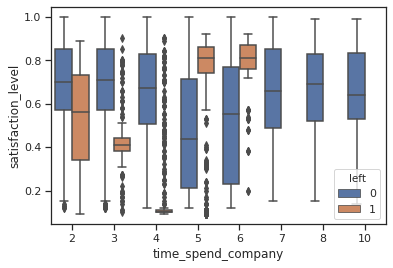

In [15]:
sns.boxplot(x = 'time_spend_company', y = 'satisfaction_level', data = df, hue = 'left')

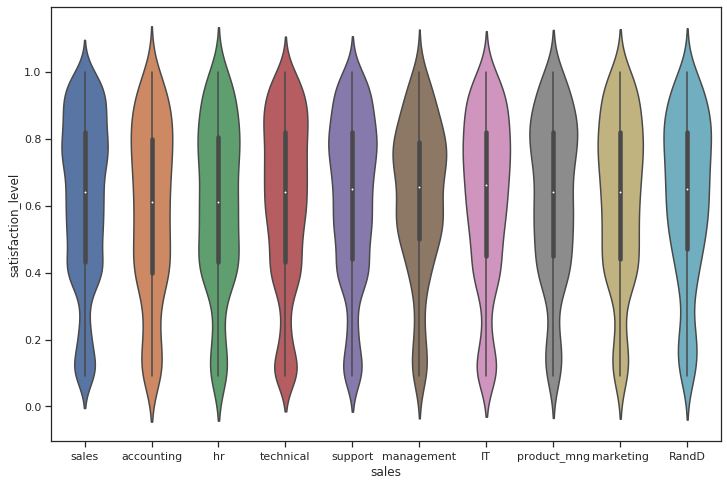

In [16]:
plt.figure(figsize = (12,8))
plot = sns.violinplot(x = 'sales', y = 'satisfaction_level', data = df)
plt.savefig('violin.pdf')

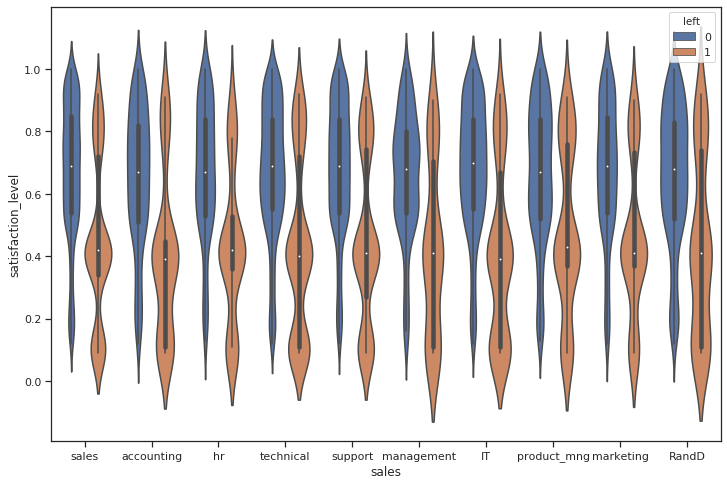

In [17]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'sales', y = 'satisfaction_level', data = df, hue = 'left')
plt.savefig('violin.pdf')

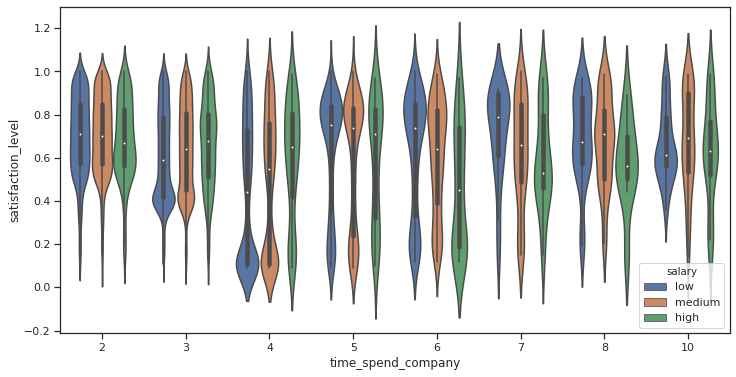

In [18]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'time_spend_company', y = 'satisfaction_level', data = df, hue = 'salary')

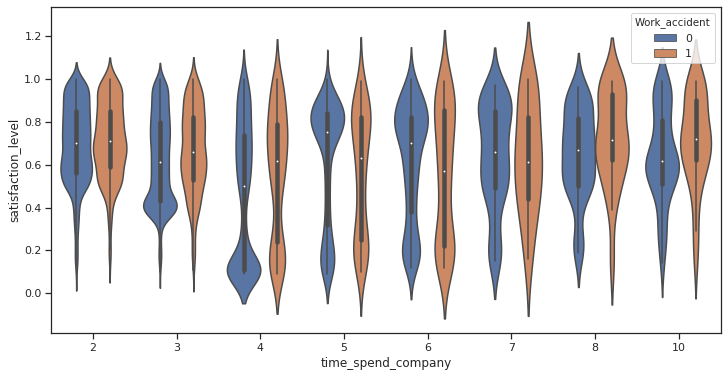

In [19]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'time_spend_company', y = 'satisfaction_level', data = df, hue = 'Work_accident')

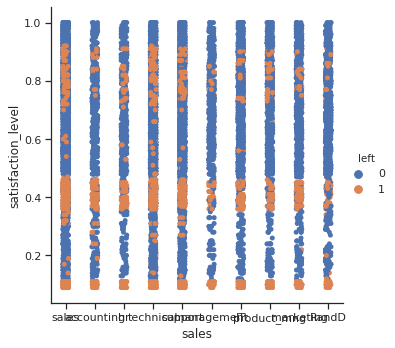

In [21]:
sns.catplot(x = 'sales', y = 'satisfaction_level', data = df, hue = 'left')

## CLUSTERING AND PCA

Text(0.5, 0, 'last_evaluation')

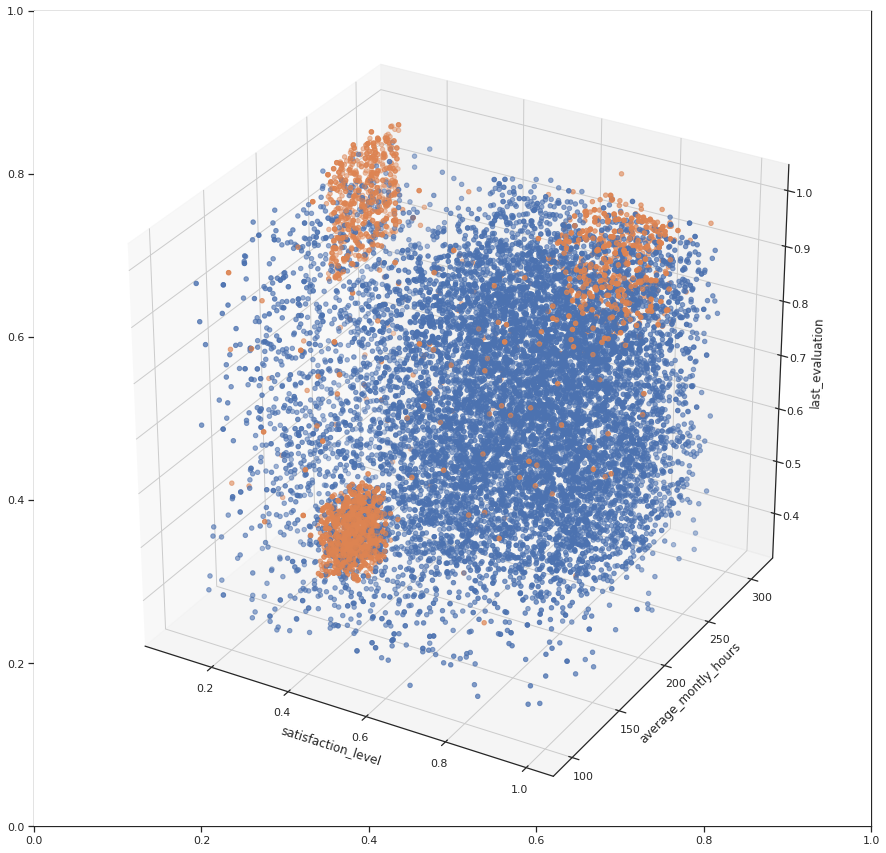

In [22]:
# 3D Plot
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
color = {0:'C0',1:'C1'}
ax.scatter(df.satisfaction_level,df.average_montly_hours,df.last_evaluation,c = df.left.apply(lambda x:color[x]))
ax.set_xlabel('satisfaction_level')
ax.set_ylabel('average_montly_hours')
ax.set_zlabel('last_evaluation')

### ONE HOT ENCODING

In [23]:
df_dummies = pd.get_dummies(df['sales'], prefix = 'department')
df_new = pd.concat([df, df_dummies], axis=1)
df_dummies = pd.get_dummies(df['salary'], prefix = 'salary')
df_new = pd.concat([df_new, df_dummies], axis=1)
df_new = df_new.drop(['sales','salary'],axis=1)

### PCA

In [41]:
from sklearn.decomposition import PCA

X = df_new.values
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

Text(0, 0.5, 'PC 2')

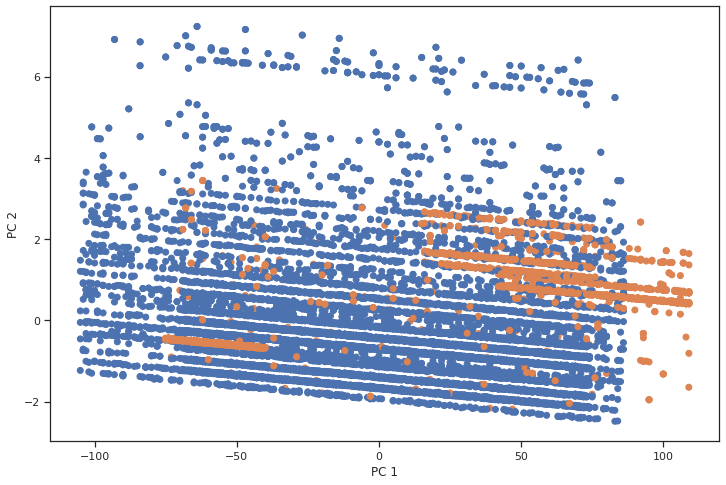

In [42]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(df_pca[:,0],df_pca[:,1],c = df.left.apply(lambda x:color[x]))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

std_pca = make_pipeline(StandardScaler(), PCA())
df_std_pca = std_pca.fit_transform(X)

Text(0, 0.5, 'PC 2')

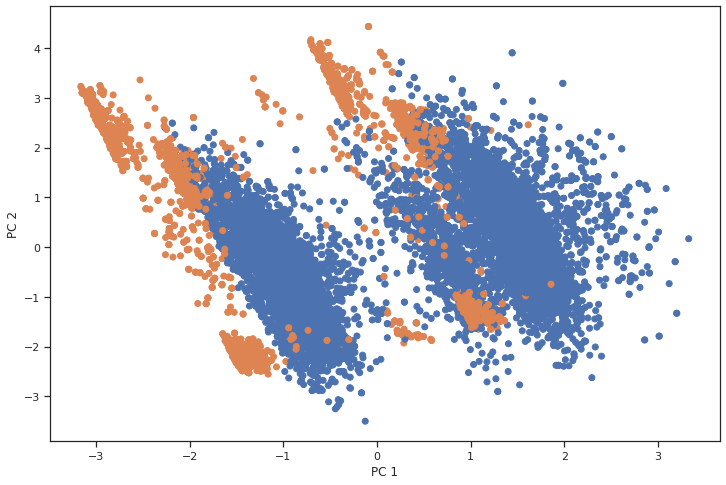

In [44]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(df_std_pca[:,0],df_std_pca[:,1],c = df_new.left.apply(lambda x:color[x]))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

### CLUSTERING

In [55]:
def cluster_count(y_pred):
    df_pred = pd.DataFrame(y_pred)
    df_pred.columns = ["cluster"]
    df_cluster = pd.concat([df_new, df_pred], axis=1)
    clusters_size= df_cluster[['cluster', 'left']].groupby('cluster').count()
    print("Cluster sizes")
    print(clusters_size)

    leaver_counts = df_cluster[df_new.left==1][['cluster', 'left']].groupby('cluster').count()
    print("Leavers per cluster")
    print(leaver_counts)

    print("% Leavers in clusters")
    perc_leavers = leaver_counts/clusters_size*100
    print(perc_leavers)
    return df_cluster

In [62]:
# cluster color map
d = {0:'C0',
     1:'C1',
     2:'C2',
    3:'C3',
    4:'C4'}

Cluster sizes
         left
cluster      
0        3455
1        3156
2        3556
3        3220
4        1612
Leavers per cluster
         left
cluster      
0         912
1          75
2        1579
3          64
4         941
% Leavers in clusters
              left
cluster           
0        26.396527
1         2.376426
2        44.403825
3         1.987578
4        58.374690


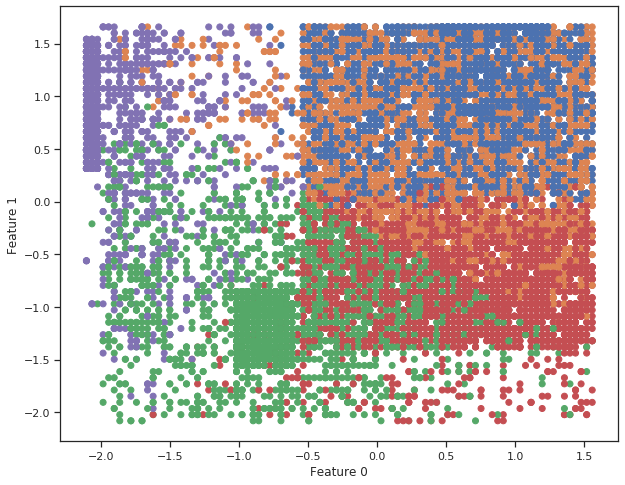

In [60]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

X = df[continuos_cols]
X_std = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

plt.figure(figsize=(10,8))
plt.scatter(X_std[:, 0], X_std[:, 1], c=[d[y] for y in y_pred])
plt.xlabel("Feature 0",fontsize=12)
plt.ylabel("Feature 1")

df_cluster = cluster_count(y_pred)

Cluster sizes
         left
cluster      
0        4418
1        1648
2         886
3        5879
4        2168
Leavers per cluster
         left
cluster      
0         926
1        1518
2         881
3         180
4          66
% Leavers in clusters
              left
cluster           
0        20.959710
1        92.111650
2        99.435666
3         3.061745
4         3.044280


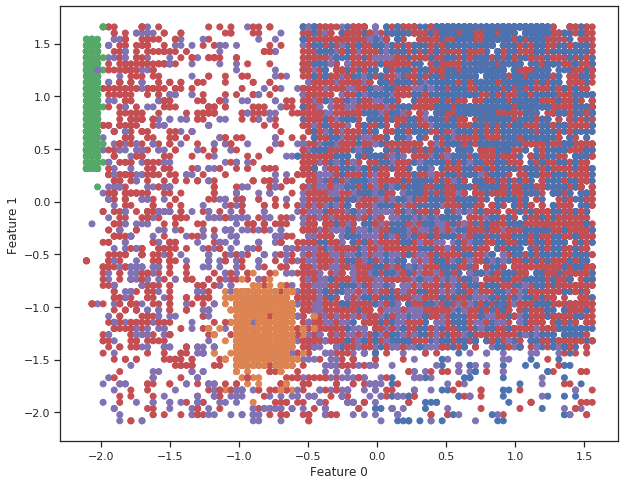

In [61]:
X = df_new[continuos_cols]
cluster = GaussianMixture(n_components=5,random_state=42)
cluster.fit(X)
y_pred = cluster.predict(X)
plt.figure(figsize=(10,8))

plt.scatter(X_std[:, 0], X_std[:, 1], c=[d[y] for y in y_pred])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

df_cluster = cluster_count(y_pred)

# MODELING PREDICTIONS

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_recall_fscore_support,make_scorer

In [65]:
def model_results(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision,recall,fscore,support = precision_recall_fscore_support(y_test,y_pred,labels = [1],average=None)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Recall of leavers: %.2f" % (recall))
    print("Precision of leavers: %.2f" % (precision))
    print("F1-score of leavers: %.2f" % (fscore))
    print()
    return accuracy,recall,precision,fscore

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('left',axis=1), df_new.left,
                                                    test_size=0.3, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
model_results(model,X_test,y_test)

Accuracy: 97.00%
Recall of leavers: 0.91
Precision of leavers: 0.96
F1-score of leavers: 0.94



(0.97, array([0.91231343]), array([0.95976447]), array([0.93543759]))

### Model Improvements

In [67]:
#use df_cluster
X_train, X_test, y_train, y_test = train_test_split(df_cluster.drop('left',axis=1), df_cluster.left,
                                                    test_size=0.3, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
model_results(model,X_test,y_test)

Accuracy: 97.04%
Recall of leavers: 0.91
Precision of leavers: 0.97
F1-score of leavers: 0.94



(0.9704444444444444,
 array([0.90764925]),
 array([0.96623635]),
 array([0.93602694]))

### Parameters Grid Search


max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of trees to fit.

In [68]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_cluster.drop('left',axis=1), df_cluster.left,
                                                    test_size=0.3, random_state=42)
parameters = {
              'max_depth': [3, 5, 10,15,20],
              'learning_rate': [0.1, 0.5, 0.01, 0.9],
              'n_estimators': [100, 200, 500],
             }
model = XGBClassifier()
grid_clf = GridSearchCV(model, parameters, cv = 5, scoring=make_scorer(f1_score), verbose=2, n_jobs=4)
_ = grid_clf.fit(X_train, y_train)

best_clf = grid_clf.best_estimator_
best_clf_params = grid_clf.best_params_
print(best_clf_params)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.4s
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.4s
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_r

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.0s


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, total=   1.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............
[CV] . learning_rate=0.1, max_depth=5, n_estimators=500, total=   2.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[CV]  

[CV] . learning_rate=0.5, max_depth=5, n_estimators=100, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV] . learning_rate=0.5, max_depth=5, n_estimators=100, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV] . learning_rate=0.5, max_depth=5, n_estimators=100, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV] . learning_rate=0.5, max_depth=3, n_estimators=500, total=   1.9s
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV] . learning_rate=0.5, max_depth=5, n_estimators=200, total=   1.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=200 ................
[CV] . learning_rate=0.5, max_depth=5, n_estimators=200, total=   1.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500 ................
[CV] . learning_rate=0.5, max_depth=5, n_estimators=200, total=   1.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500 ................
[CV] .

[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, total=   0.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.5, max_depth=20, n_estimators=500, total=   4.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min


[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200, total=   0.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.5, max_depth=20, n_estimators=500, total=   4.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=3, n_estimators=500, total=   1.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=500 ...............
[CV]  

[CV] learning_rate=0.01, max_depth=20, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100, total=   1.3s
[CV] learning_rate=0.01, max_depth=20, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100, total=   1.3s
[CV] learning_rate=0.01, max_depth=20, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200, total=   2.9s
[CV] learning_rate=0.01, max_depth=20, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200, total=   2.8s
[CV] learning_rate=0.01, max_depth=20, n_estimators=200 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200, total=   2.9s
[CV] learning_rate=0.01, max_depth=20, n_estimators=500 ..............
[CV]  learning_rate=0.01, max_depth=15, n_estimators=500, total=   7.9s
[CV] learning_rate=0.01, max_depth=20, n_estimators=500 ..............
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200, total=   3.0s

[CV] learning_rate=0.9, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=100, total=   1.0s
[CV] learning_rate=0.9, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=100, total=   1.0s
[CV] learning_rate=0.9, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=100, total=   1.0s
[CV] learning_rate=0.9, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=100, total=   1.0s
[CV] learning_rate=0.9, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.9, max_depth=10, n_estimators=500, total=   3.3s
[CV] learning_rate=0.9, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=200, total=   1.7s
[CV] learning_rate=0.9, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.9, max_depth=15, n_estimators=200, total=   1.7s
[CV] l

[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  3.0min finished


{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}


In [69]:
df_results = pd.DataFrame(grid_clf.cv_results_)
df_results = df_results.sort_values(by='rank_test_score').reset_index()
print('Best model results on training set')
model_results(best_clf,X_train,y_train)
print('Best model results on test set')
model_results(best_clf,X_test,y_test)
print('Full results')
print(df_results.iloc[0])

Best model results on training set
Accuracy: 99.91%
Recall of leavers: 1.00
Precision of leavers: 1.00
F1-score of leavers: 1.00

Best model results on test set
Accuracy: 98.76%
Recall of leavers: 0.96
Precision of leavers: 0.99
F1-score of leavers: 0.97

Full results
index                                                                 12
mean_fit_time                                                     1.8432
std_fit_time                                                   0.0274403
mean_score_time                                                0.0197119
std_score_time                                                0.00042514
param_learning_rate                                                  0.1
param_max_depth                                                       20
param_n_estimators                                                   100
params                 {'learning_rate': 0.1, 'max_depth': 20, 'n_est...
split0_test_score                                               0.973469
s

# Benchmark

In [70]:
# Benchmark model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

classifiers = [lr_clf, svm_clf, tree_clf, rf_clf,best_clf]
clf_names = ['LogisticRegression','SVM','DecisisionTree','RandomForest','XGB']
metrics = ['accuracy','precision','recall','fscore']
results = dict()

for ind in range(len(classifiers)):
    clf = classifiers[ind]
    clf.fit(X_train, y_train)
    print(clf_names[ind])
    results[clf_names[ind]] = dict()
    aprf = model_results(clf,X_test,y_test)
    for ind2 in range(len(aprf)):
        results[clf_names[ind]][metrics[ind2]] = aprf[ind2]



LogisticRegression
Accuracy: 89.13%
Recall of leavers: 0.74
Precision of leavers: 0.79
F1-score of leavers: 0.76

SVM
Accuracy: 95.73%
Recall of leavers: 0.91
Precision of leavers: 0.91
F1-score of leavers: 0.91

DecisisionTree
Accuracy: 97.22%
Recall of leavers: 0.96
Precision of leavers: 0.93
F1-score of leavers: 0.94

RandomForest
Accuracy: 98.40%
Recall of leavers: 0.95
Precision of leavers: 0.99
F1-score of leavers: 0.97

XGB
Accuracy: 98.76%
Recall of leavers: 0.96
Precision of leavers: 0.99
F1-score of leavers: 0.97



In [71]:
# change key order for plotting
results_new = dict()
for m in metrics:
    results_new[m] = dict()
    for clf in clf_names:
        results_new[m][clf] = results[clf][m]

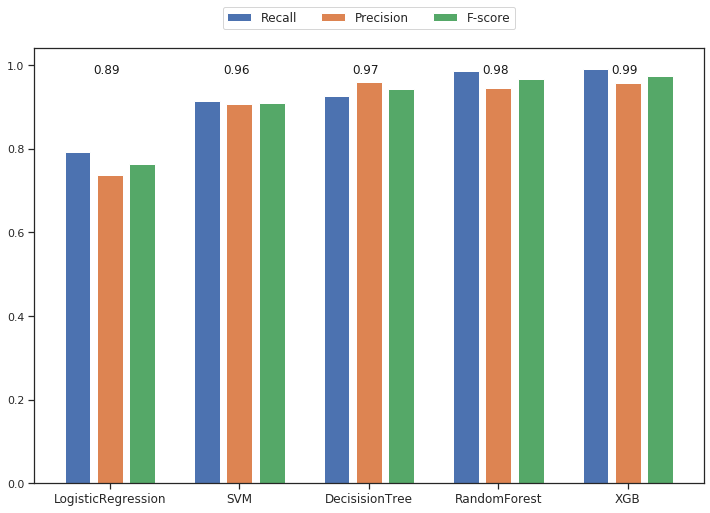

In [72]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111)
ind = np.arange(5)
width = 0.25

sns.set_style('whitegrid')
plt.bar(ind, np.squeeze(list(results_new['recall'].values())), align="center", width=width*.8)
plt.bar(width + ind, np.squeeze(list(results_new['precision'].values())), align="center", width=width*.8)
plt.bar(2*width + ind, np.squeeze(list(results_new['fscore'].values())), align="center", width=width*.8)

plt.xticks(np.arange(5), clf_names,rotation=0,size=12)
ax.set_xticks(ind + width)
ax.legend(['Recall','Precision','F-score'],fontsize=12,
           ncol=3,loc='upper center',bbox_to_anchor=(0.5, 1.11))
for num, v in enumerate(list(results_new['accuracy'].values())):
     ax.annotate('%.2f'%v, (ind[num]+ 0.5*width,0.98),size=12,color='k')
    
    